## Кириленко Елена

## Задача 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
%matplotlib inline

Для проверки гипотезы о независимости породы коровы от жирности молока будем использовать критерий хи-квадрат. Также для его использования нужно проверить, что его можно использовать, то есть доля клеток, в которых ожидаемое количество меньше 5 должно быть не больше 20%.

In [7]:
data = np.array([[13, 35, 26, 46], [22, 45, 48, 75], [18, 30, 15, 47], [44, 62, 56, 68]])
pd.DataFrame(data)

,0,1,2,3
0,13,35,26,46
1,22,45,48,75
2,18,30,15,47
3,44,62,56,68


In [5]:
chi2, p, dof, expected = sps.chi2_contingency(data)
(expected < 5).mean()

0.0

Все хорошо, можно использовать

In [8]:
chi2, p

(16.275891254401127, 0.06133904461935207)

Видим, что статистически значимой зависимости не наблюдается. То есть гипотеза о независимости не отвергается на уровне значимости $\alpha = 0.05$)

## Задача 2

In [11]:
data = np.load('hw5t2a.npy')
X = data[:,0]
Y = data[:,1]

Посмотрим на график зависимостей, а также на различные статистики -   коэффициенты корреляции Пирсона, Спирмена и Кенделла и на соответствующие им pvalue.

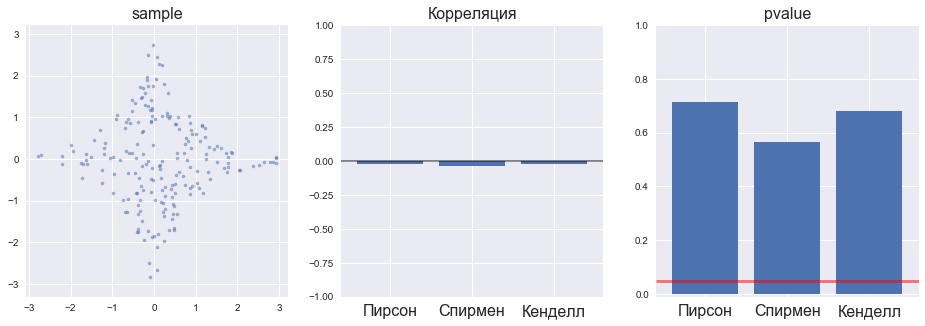

In [21]:
r, pr = sps.pearsonr(X, Y)
rho, prho = sps.spearmanr(X, Y)
tau, ptau = sps.kendalltau(X, Y)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(X, Y, alpha=0.5, s=10)
plt.axis('equal')
plt.title('sample', fontsize=16)

plt.subplot(1, 3, 2)
rects = plt.bar([1, 2, 3], [r, rho, tau])
plt.hlines(0, 0.4, 3.6, color='black', alpha=0.5)
plt.xticks([1, 2, 3], ['Пирсон', 'Спирмен', 'Кенделл'], fontsize=16)
plt.title('Корреляция', fontsize=16)
plt.xlim((0.4, 3.6)), plt.ylim((-1, 1))

plt.subplot(1, 3, 3)
plt.bar([1, 2, 3], [pr, prho, ptau])
plt.hlines(0.05, 0.4, 3.6, color='red', alpha=0.5, lw=3)
plt.xticks([1, 2, 3], ['Пирсон', 'Спирмен', 'Кенделл'], fontsize=16)
plt.title('pvalue', fontsize=16)
plt.xlim((0.4, 3.6)), plt.ylim((-0.01, 1))

plt.show()

Видим, что гипотеза о независимости не отвергается, то есть не наблюдается статистически значимой зависимости.
Однако, если посмотреть на график выборок, то можно понять, что зависимость все-таки есть. Это еще раз показывает, что коффициенты корреляции показывают именно корреляцию, то есть условно говоря, линейную зависимость.

## Задача 3

Нам нужно исследовать зависимость вещественного признака от категориального. Для этого нужно разбить вещестсвенную переменную на несколько интервалов, там самым превратив ее в категориальную.

In [66]:
data = np.load('hw5t3.npy')
names = data[:, 0]
times = np.array(data[:,1], dtype=float)

In [67]:
np.unique(names)

array(['Bandersnatch', 'Humpty-Dumpty', 'Mr. Fattakhov',
       'Tweedledee and Tweedledum'], dtype='<U25')

Сначала посмотрим визуально. Для этого построим KDE для каждого значения категориального признака.

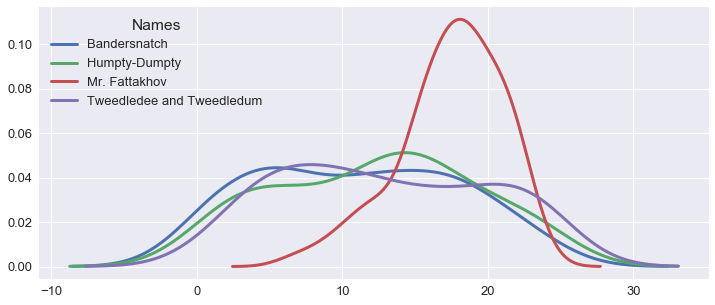

In [68]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 5))
sns.kdeplot(times[names == 'Bandersnatch'], label='Bandersnatch', lw=3)
sns.kdeplot(times[names == 'Humpty-Dumpty'], label='Humpty-Dumpty', lw=3)
sns.kdeplot(times[names == 'Mr. Fattakhov'], label='Mr. Fattakhov', lw=3)
sns.kdeplot(times[names == 'Tweedledee and Tweedledum'], label='Tweedledee and Tweedledum', lw=3)


plt.legend(title='Names');

Видно, что зависимость есть. Посмотрим, что 

In [69]:
names[names=='Bandersnatch'] = 0
names[names=='Humpty-Dumpty'] = 1
names[names == 'Mr. Fattakhov'] = 2
names[names == 'Tweedledee and Tweedledum'] = 3
names = np.array(names, dtype=int)

In [104]:
obs = np.histogram2d(names, times, bins=(4, 5))
obs

(array([[22., 21., 22., 19., 13.],
        [14., 12., 18., 18., 13.],
        [ 0.,  5., 20., 77., 52.],
        [12., 15., 15., 14., 18.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([ 0.10018754,  4.8785538 ,  9.65692005, 14.43528631, 19.21365257,
        23.99201882]))

Применяем критерий хи-квадрат

In [105]:
chi2, p, dof, expected = sps.chi2_contingency(obs[0])
(expected < 5).mean()

0.0

Можно применять, хорошо. Теперь посмотрим на статистику и pvalue

In [106]:
chi2, p

(94.0425233612206, 8.107242179785724e-15)

Гипотеза о независимости отвергается, то есть эти выборки статистически значимо зависимы. Зависимость также подтверждает график с KDE.

## Задача 4

In [128]:
data = np.load('hw5t4.npy')
data.shape

(10, 100)

Для проверки гипотезы о независимости выборок в совокупности, посчитаем коеффициент конкордации Кендалла

In [130]:
k, n = data.shape
W = 12 / (k ** 2 * (n ** 3 - n)) * np.sum((data.argsort(axis=1).sum(axis=0) - k * (n + 1) / 2) ** 2)
W

0.08104818481848185

Коеффициент получился довольно небольшим, поэтому зависимость не очень явная

In [133]:
data = pd.DataFrame(data)

Посмотрим на матрицу корреляций

In [136]:
R = data.corr(method='spearman')
R.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.139394,0.684848,0.418182,0.103030,-0.563636,-0.309091,-0.696970,0.018182,0.151515,...,0.042424,0.200000,0.103030,-0.600000,-0.418182,0.345455,0.175758,-0.551515,-0.212121,0.454545
1,0.139394,1.000000,-0.042424,-0.200000,-0.103030,-0.369697,-0.200000,0.272727,0.090909,-0.272727,...,0.490909,0.260606,0.309091,-0.515152,-0.333333,0.090909,0.030303,0.042424,-0.612121,-0.030303
2,0.684848,-0.042424,1.000000,0.442424,0.090909,-0.490909,-0.163636,-0.709091,-0.006061,0.103030,...,-0.103030,0.260606,-0.030303,-0.587879,0.006061,0.612121,0.212121,-0.515152,0.163636,0.648485
3,0.418182,-0.200000,0.442424,1.000000,-0.260606,-0.551515,0.272727,-0.430303,-0.309091,0.175758,...,0.151515,-0.187879,-0.296970,-0.030303,-0.066667,0.466667,0.042424,-0.381818,-0.187879,0.139394
4,0.103030,-0.103030,0.090909,-0.260606,1.000000,0.515152,-0.854545,-0.260606,0.418182,-0.454545,...,0.151515,0.466667,-0.272727,-0.236364,-0.127273,-0.381818,-0.127273,0.078788,0.345455,-0.284848


In [157]:
top_5_max = np.array([0., 0., 0., 0., 0.])
indeces = np.array([(0, 0), (0,0), (0,0), (0,0), (0,0)])
for i in range(len(R)):
    for j in range(i+1, len(R)):
        if np.abs(R[i][j]) > np.min(top_5_max):
            cond = np.where(top_5_max == np.min(top_5_max))[0][0]
            top_5_max[cond] = np.abs(R[i][j])
            indeces[cond] = (i,j)

In [156]:
top_5_max

array([0.95151515, 0.96363636, 0.9030303 , 0.9030303 , 0.93939394])

Посмотрим какие пары признаков оказались самыми коррелированными между собой.

In [159]:
indeces

array([[66, 99],
       [22, 36],
       [40, 86],
       [19, 48],
       [47, 96]])